In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
categorical_cols = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal', 'num']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [5]:
scaler = StandardScaler()
continuous_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

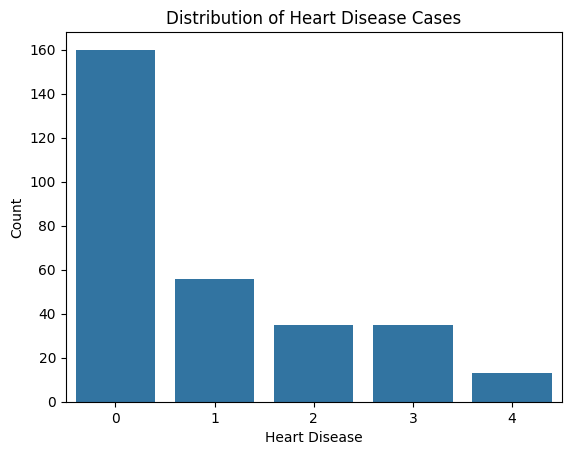

In [6]:
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

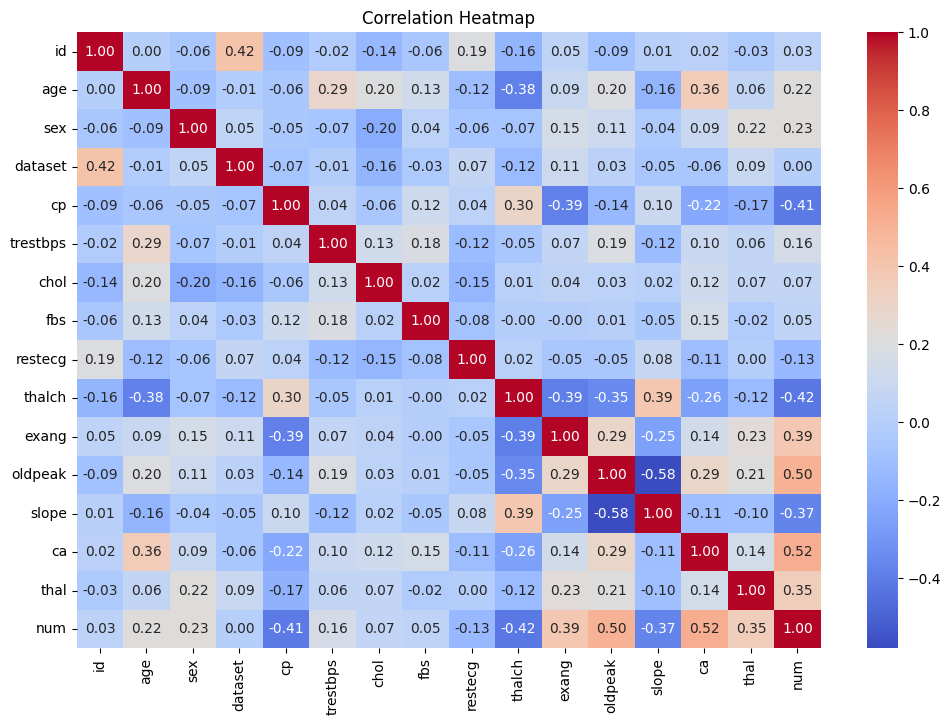

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

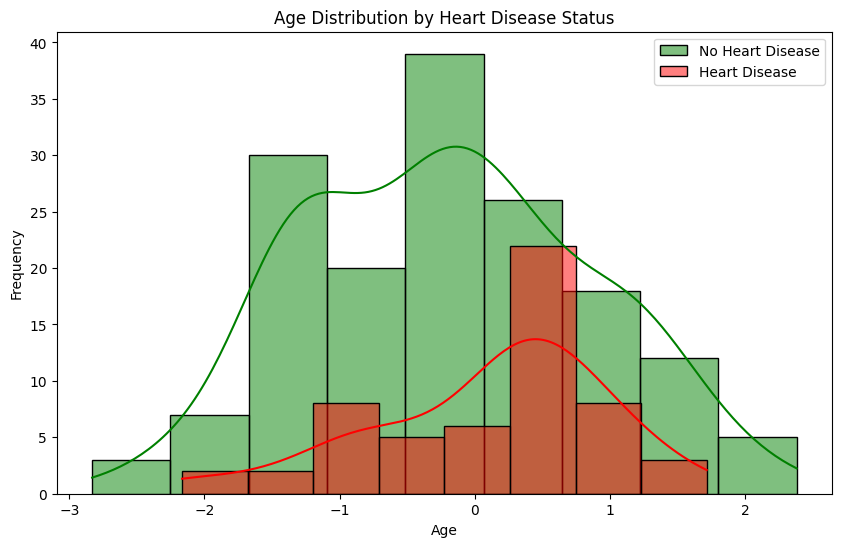

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['num'] == 0]['age'], color='green', kde=True, label='No Heart Disease')
sns.histplot(df[df['num'] == 1]['age'], color='red', kde=True, label='Heart Disease')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

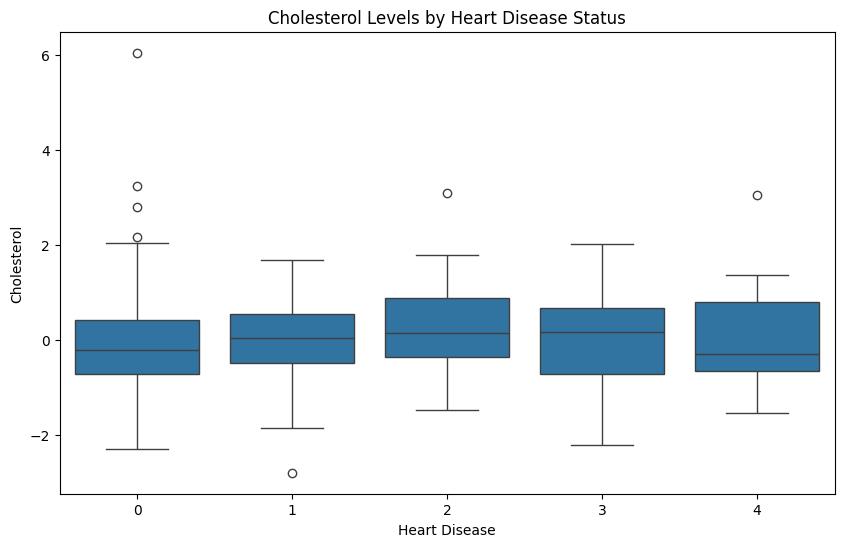

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

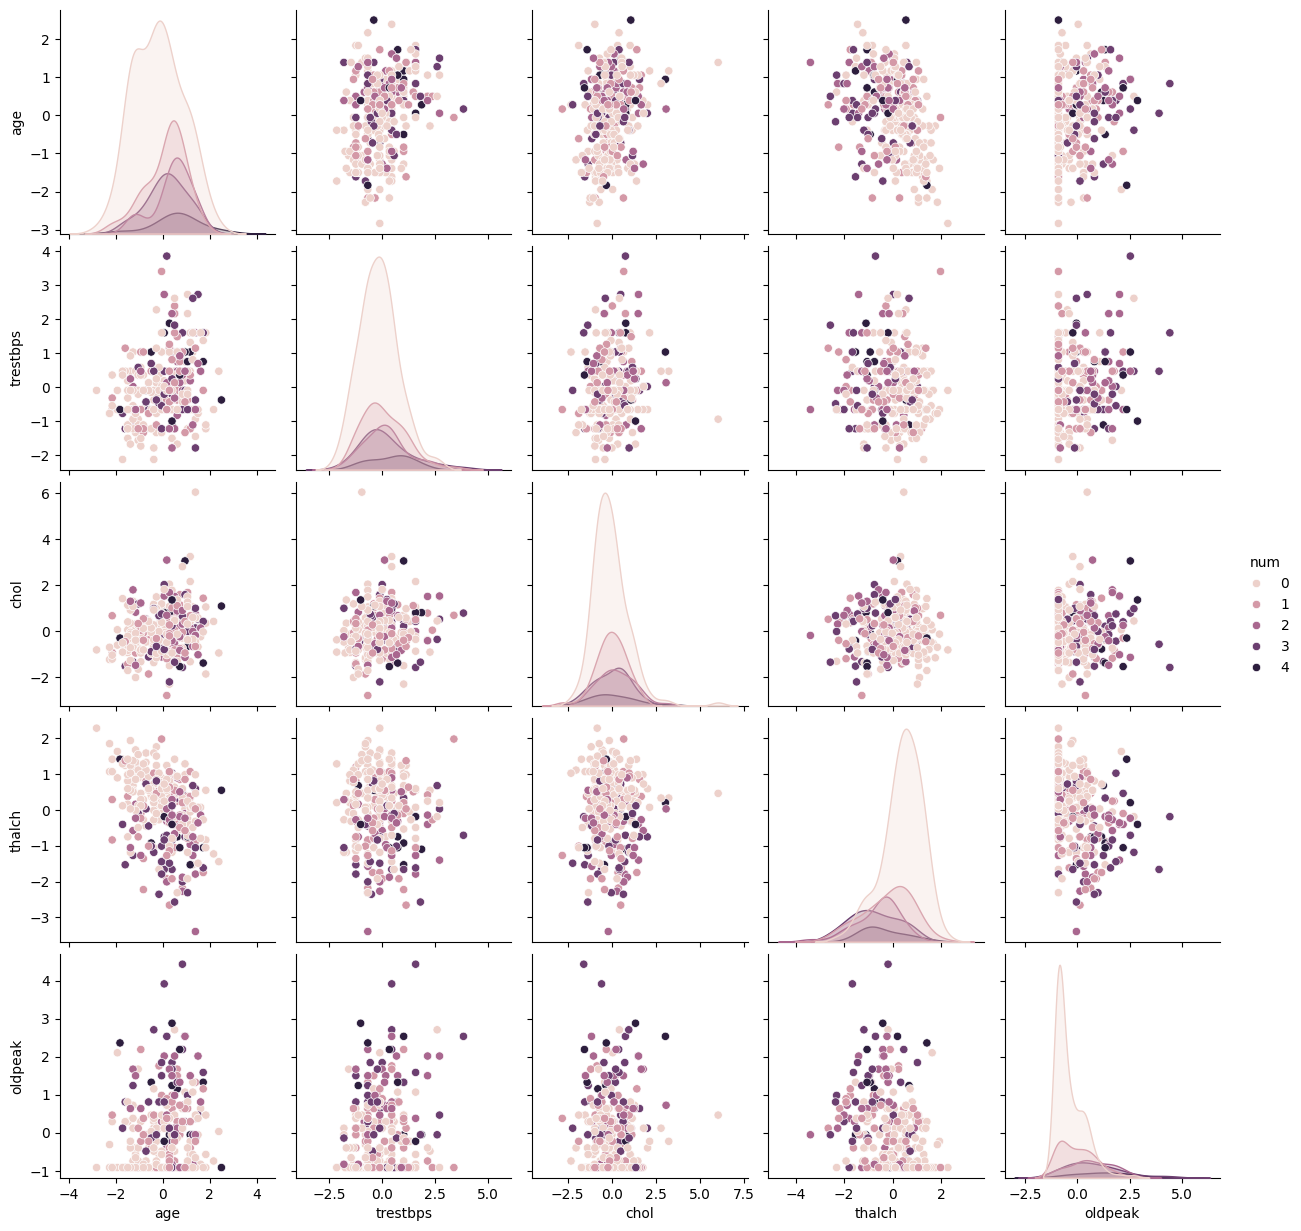

In [10]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']], hue='num', diag_kind='kde')
plt.show()

In [12]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.65
Confusion Matrix:
[[35  0  0  0  0]
 [ 4  4  1  4  0]
 [ 2  1  0  2  0]
 [ 2  1  1  0  0]
 [ 1  0  1  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        35
           1       0.67      0.31      0.42        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.29      0.26      0.26        60
weighted avg       0.61      0.65      0.61        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision (Use 'macro' averaging for multiclass)
precision = precision_score(y_test, y_pred, average='macro') # Changed line
print(f'Precision: {precision:.2f}')

# Calculate recall (Use 'macro' averaging for multiclass)
recall = recall_score(y_test, y_pred, average='macro') # Changed line
print(f'Recall: {recall:.2f}')

# Calculate F1 score (Use 'macro' averaging for multiclass)
f1 = f1_score(y_test, y_pred, average='macro') # Changed line
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.65
Precision: 0.29
Recall: 0.26
F1 Score: 0.26


Accuracy: 0.65
Precision: 0.29
Recall: 0.26
F1 Score: 0.26


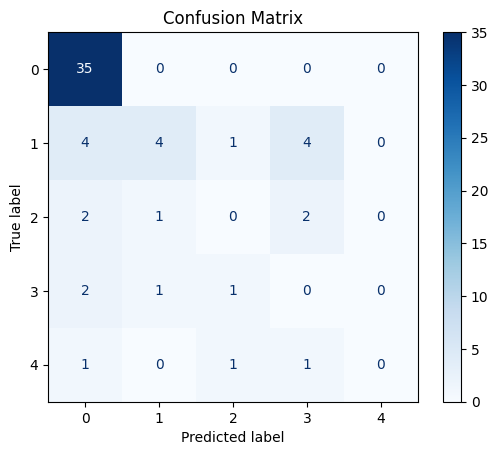

In [18]:
# Make predictions on the testing set
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# Use 'macro' averaging for multiclass problems
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()